## Implementing random graph and finding out the measure of centrality

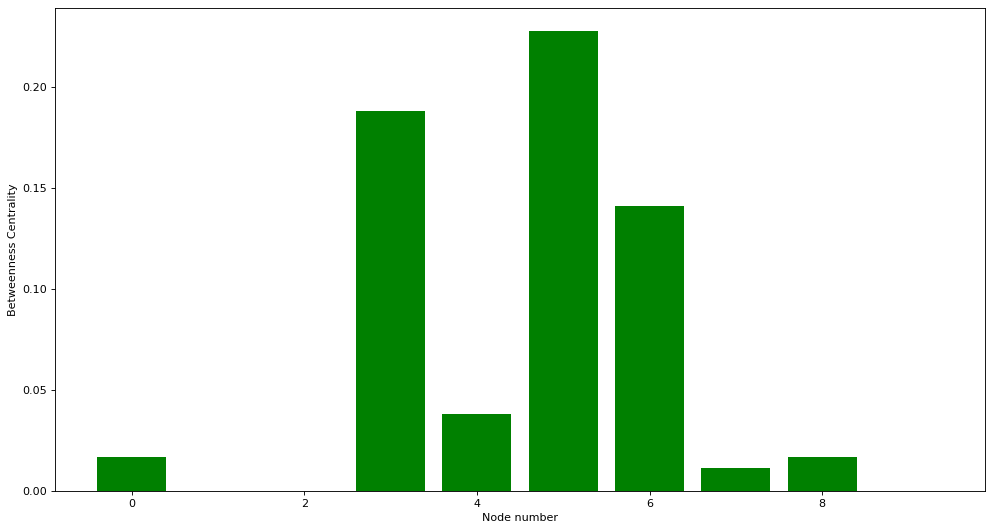

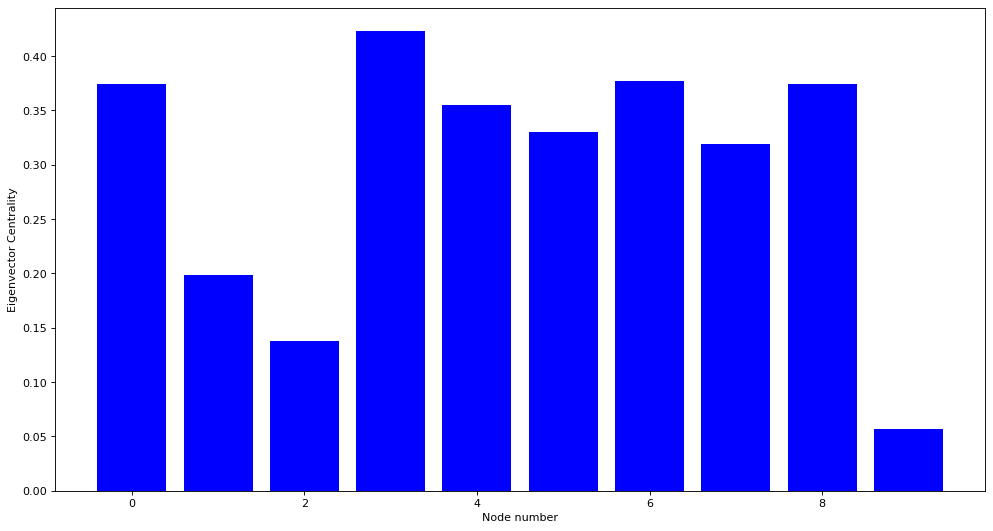

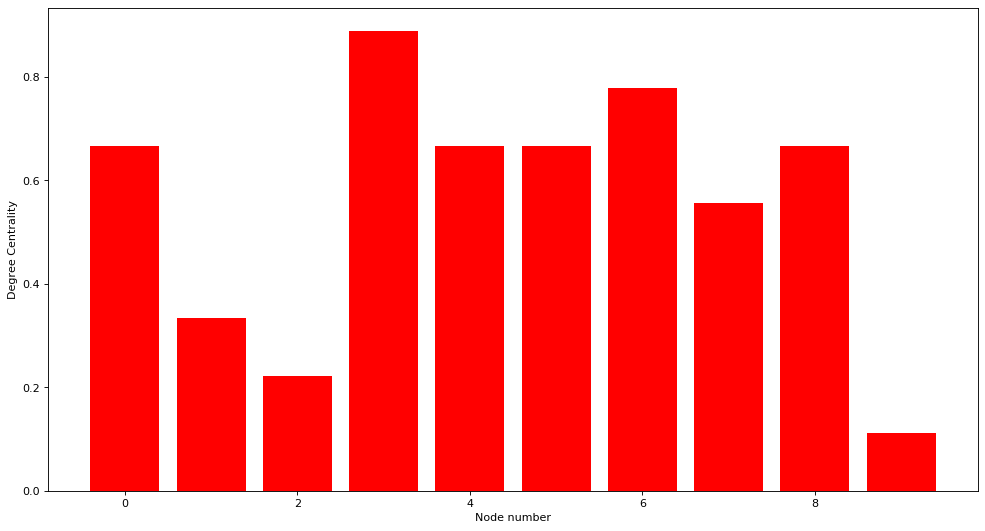

{0: 1.0576146920596412, 1: 0.531746039761229, 2: 0.35967573765832267, 3: 1.5003658592343627, 4: 1.0595374561424307, 5: 1.2250253142756256, 6: 1.295264206419067, 7: 0.8857232412193008, 8: 1.0576146920596412, 9: 0.16789187949002873}
[1.0576146920596412, 0.531746039761229, 0.35967573765832267, 1.5003658592343627, 1.0595374561424307, 1.2250253142756256, 1.295264206419067, 0.8857232412193008, 1.0576146920596412, 0.16789187949002873]


In [42]:
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import networkx as nx

G = nx.random_geometric_graph(10, 0.50)

edge_x = []
edge_y = []

for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Degree of potentiality',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))


btwn_centrality=(nx.betweenness_centrality(G))
egn_centrality=nx.eigenvector_centrality(G)
degree_centrality=nx.degree_centrality(G)

figure(num=None, figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')
plt.bar(list(btwn_centrality.keys()), btwn_centrality.values(), color='g')
plt.xlabel(xlabel="Node number")
plt.ylabel(ylabel="Betweenness Centrality")
plt.show()


figure(num=None, figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')
plt.bar(list(egn_centrality.keys()), egn_centrality.values(), color='b')
plt.xlabel(xlabel="Node number")
plt.ylabel(ylabel="Eigenvector Centrality")
plt.show()


figure(num=None, figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')
plt.bar(list(degree_centrality.keys()), degree_centrality.values(), color='r')
plt.xlabel(xlabel="Node number")
plt.ylabel(ylabel="Degree Centrality")
plt.show()

for key in egn_centrality: 
    if key in btwn_centrality: 
        egn_centrality[key] = egn_centrality[key] + btwn_centrality[key] 
    else: 
        pass
          
for key in degree_centrality: 
    if key in egn_centrality: 
        degree_centrality[key] = degree_centrality[key] + egn_centrality[key] 
    else: 
        pass

print(degree_centrality)


node_adjacencies = []
node_text = []


    
node_adjacencies = []   
for key in degree_centrality:
    node_adjacencies.append(degree_centrality[key])
    node_text.append('Degree of potential node: '+str(degree_centrality[key])+ ' Node Number: '+str(key))

print(node_adjacencies)
node_trace.marker.color = node_adjacencies
node_trace.text = node_text

fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

## Implementation on a test case

The node that has maximum betweenness centrality score:  110


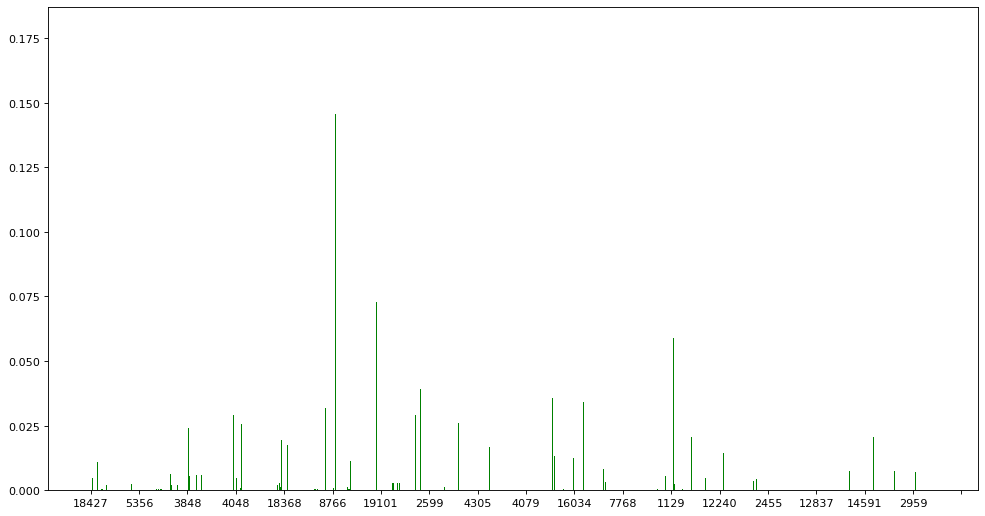

The node that has maximum eigenvector centrality score:  61


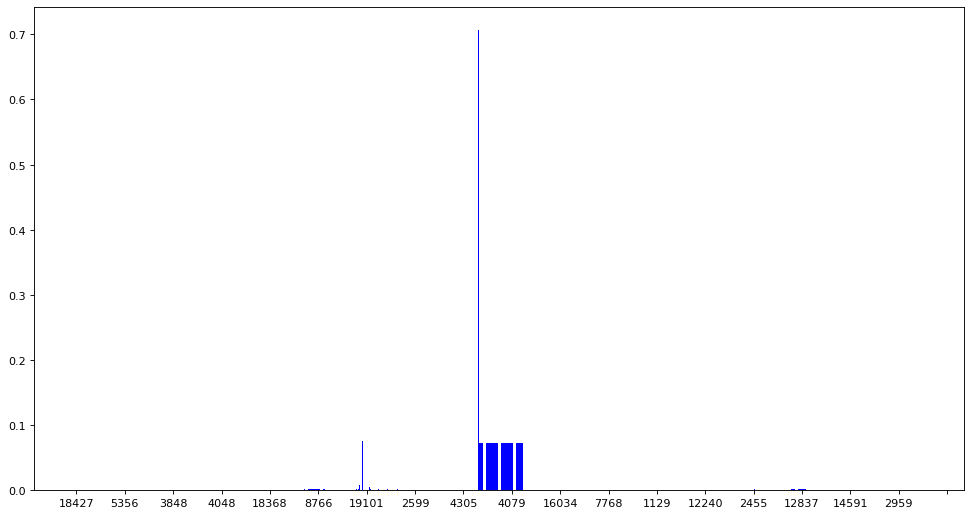

The node that has maximum degree centrality score:  61


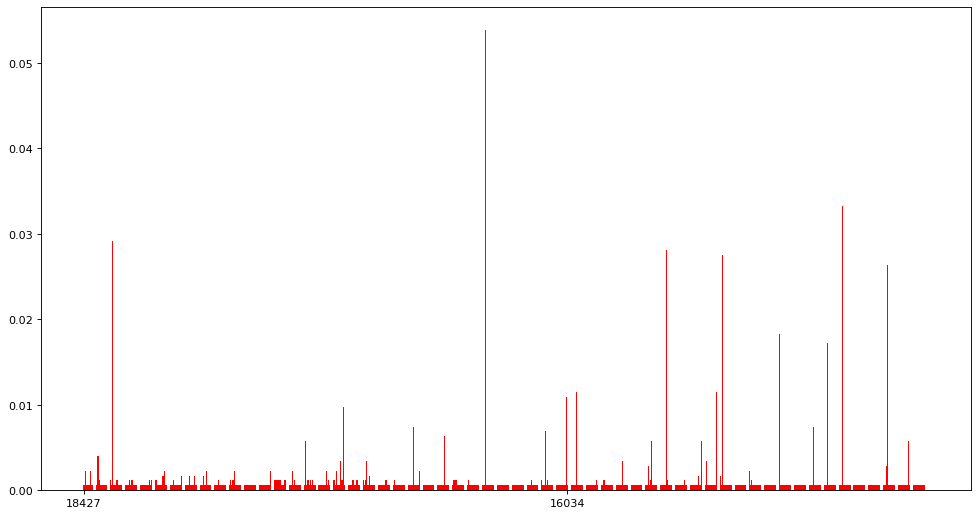

In [49]:
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

import os
from matplotlib.pyplot import figure

G=nx.read_edgelist("test2.csv",  delimiter=',')

btwn_centrality=(nx.betweenness_centrality(G))
egn_centrality=nx.eigenvector_centrality(G,max_iter=600)
degree_centrality=nx.degree_centrality(G)


print("The node that has maximum betweenness centrality score: ", max(btwn_centrality, key=btwn_centrality.get))
figure(num=None, figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')
plt.bar(list(btwn_centrality.keys()), btwn_centrality.values(), color='g')
plt.xlabel(xlabel="Node number")
plt.ylabel(ylabel="Betweenness Centrality")
plt.xticks(np.arange(1, 1850, step=100))
plt.show()


print("The node that has maximum eigenvector centrality score: ", max(egn_centrality, key=egn_centrality.get))
figure(num=None, figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')
plt.bar(list(egn_centrality.keys()), egn_centrality.values(), color='b')
plt.xlabel(xlabel="Node number")
plt.ylabel(ylabel="Eigenvector Centrality")
plt.xticks(np.arange(1, 1850, step=100))
plt.show()

print("The node that has maximum degree centrality score: ", max(degree_centrality, key=degree_centrality.get))
figure(num=None, figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')
plt.bar(list(degree_centrality.keys()), degree_centrality.values(), color='r')
plt.xlabel(xlabel="Node number")
plt.ylabel(ylabel="Degree Centrality")
plt.xticks(np.arange(1, 2000, step=1000))
plt.show()


## Finding the most influential node for test case

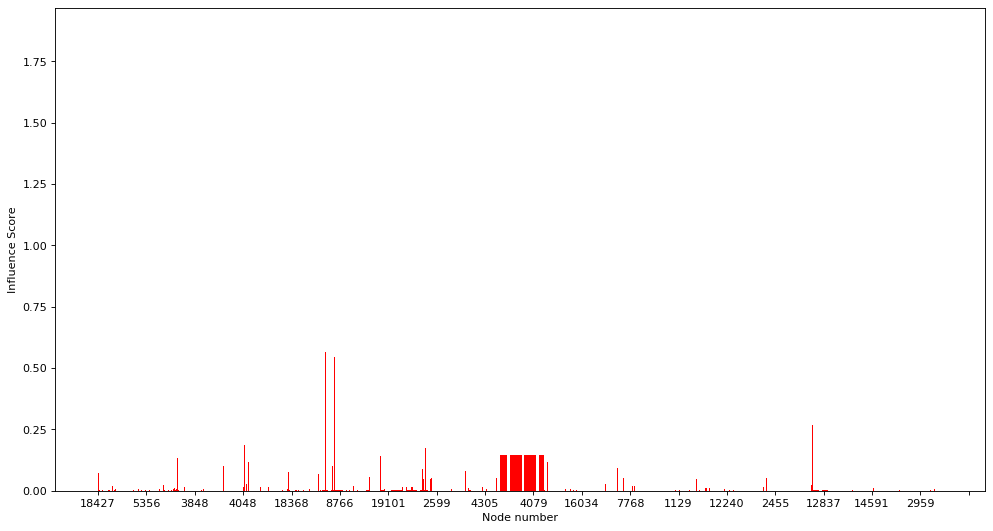

In [51]:
for key in egn_centrality: 
    if key in btwn_centrality: 
        egn_centrality[key] = egn_centrality[key] + btwn_centrality[key] 
    else: 
        pass
          
for key in degree_centrality: 
    if key in egn_centrality: 
        degree_centrality[key] = degree_centrality[key] + egn_centrality[key] 
    else: 
        pass

max(degree_centrality, key=degree_centrality.get)

figure(num=None, figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')
plt.bar(list(degree_centrality.keys()), degree_centrality.values(), color='r')
plt.xticks(np.arange(1, 1850, step=100))
plt.xlabel(xlabel="Node number")
plt.ylabel(ylabel="Influence Score")
plt.show()

## Influential node with value

In [56]:
print("Most influential Node: ",max(degree_centrality, key=degree_centrality.get))
print("Influence score of most influential node: ", max(degree_centrality.values()))

Most influential Node:  61
Influence score of most influential node:  1.8743825794958027
